In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
#index is set to date column of the dataset and parsedat function is used so that pandas recognzizes that the entries are actually dates
df.index.freq='MS' #To specify that we are dealing with monthly data

In [7]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

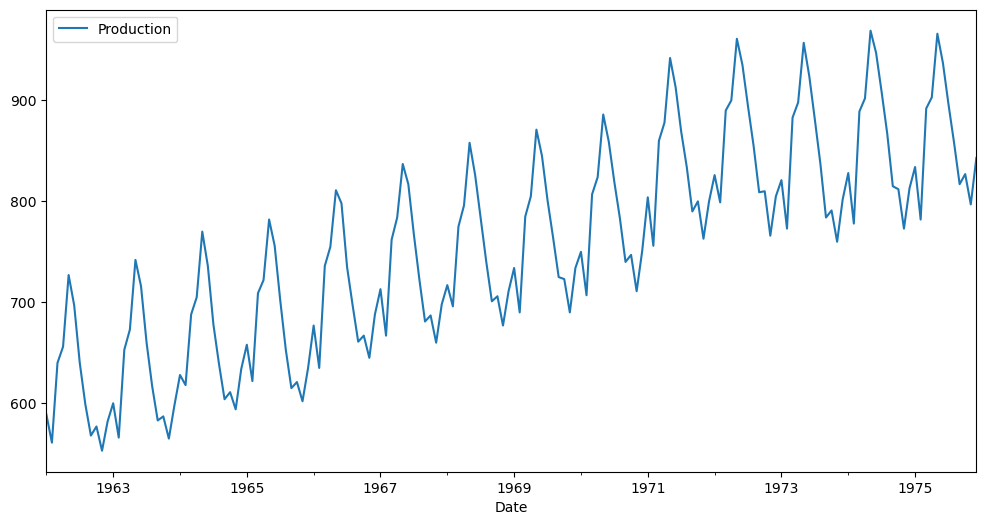

In [8]:
df.plot(figsize=(12,6))

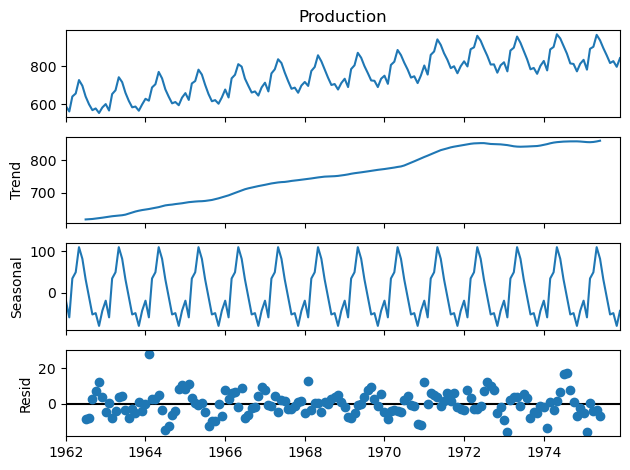

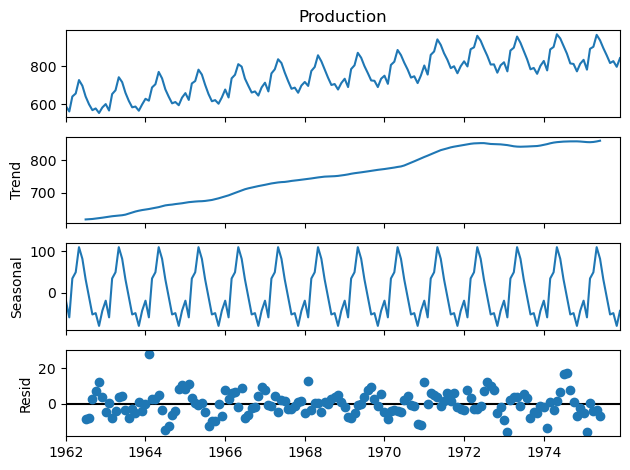

In [9]:
#to observe the data carefully
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot()


The difference between stationary and non-stationary data lies in their statistical properties over time:

Stationary Data:
Constant Mean: The mean of the data does not change over time.
Constant Variance: The variance (the spread of the data) remains constant over time.
Constant Autocovariance: The autocovariance (the relationship between data points at different times) depends only on the lag between them, not on the actual time at which it is computed.
Example: White noise or a sine wave with a constant amplitude and frequency.
Non-Stationary Data:
Changing Mean: The mean of the data changes over time.
Changing Variance: The variance of the data changes over time.
Changing Autocovariance: The autocovariance depends on the actual time at which it is computed, not just the lag.
Examples: Economic data like GDP or stock prices, which tend to show trends or seasonal effects.
Why It Matters:
Modeling and Analysis: Most statistical models assume stationarity. Non-stationary data can lead to misleading results if not properly handled.
Transformations: Non-stationary data often need to be transformed into stationary data (e.g., by differencing, detrending, or using more sophisticated techniques like the Augmented Dickey-Fuller test) before applying many time series analysis techniques.
Understanding whether your data is stationary or non-stationary helps determine the appropriate methods for analysis and modeling.

In [ ]:
#RNNS can work on stationary data, in order to get better results in some cases we can convert stationary data to non-stationary data  

In [11]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [10]:
len(df)

168

In [12]:
#last 12 months dataset stored as test dataset 
train =df.iloc[:156]
test =df.iloc[156:]

In [14]:
train

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1974-08-01,867
1974-09-01,815
1974-10-01,812


In [13]:
test

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966
1975-06-01,937
1975-07-01,896
1975-08-01,858
1975-09-01,817


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [18]:
scaler.fit(train) #this will calculate the minimum value, maximum value ,standard deviation etc
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [21]:
import keras
print(keras.__version__)


3.3.3


In [23]:
pip install --upgrade keras


Note: you may need to restart the kernel to use updated packages.


In [25]:
#how to create batches of 3 inputs which give one output 
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
#define generator
n_inputs =3
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_inputs, batch_size=1)

In [31]:
X,y = generator[0]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [32]:
X,y = generator[1]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the array: 
[0.01923077 0.20913462 0.24759615]
Predict this y: 
 [[0.41826923]]


In [33]:
X,y = generator[2]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the array: 
[0.20913462 0.24759615 0.41826923]
Predict this y: 
 [[0.34615385]]


In [34]:
X.shape #1= row, 3= no of column, 1= no of features

(1, 3, 1)

In [37]:
#We do the same thing, but now instead for 12 months 
n_input=12
generator_= TimeseriesGenerator(scaled_train, scaled_train, length=n_input,batch_size=1)

In [38]:
X,y = generator_[0]
print(f'Given the array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the array: 
[0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154]
Predict this y: 
 [[0.11298077]]


In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [40]:
#define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss ='mse')


c:\Users\user\anaconda3\CONDA\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
#fit model
model.fit(generator, epochs = 50)

Epoch 1/50
 15/144 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3552 

c:\Users\user\anaconda3\CONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1593
Epoch 2/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0247
Epoch 3/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0210
Epoch 4/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0157
Epoch 5/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0328
Epoch 6/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0161
Epoch 7/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0141
Epoch 8/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0097
Epoch 9/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0106
Epoch 10/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0066
Epoch 11/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0077
Epoch 12/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050
Epoch 13/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043
Epoch 14/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043
Epoch 15/50
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041


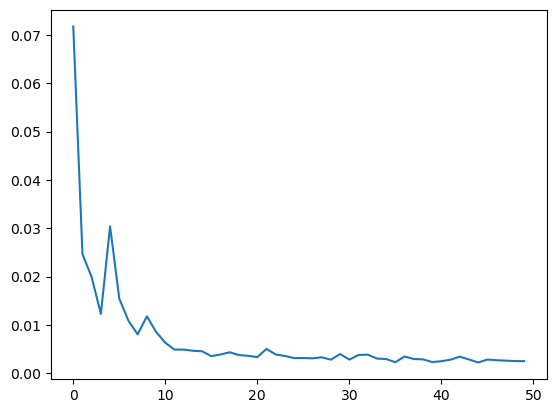

In [43]:
#plot the loss to see till which epoch we can stop training 
loss_per_epoch= model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)
#by looking at the graph we can see that we can stop at about 30 epochs after which loss remains same

To create the first prediction for the test data we need the last 12 values of the training data and then we have to reshape it in the format we get  from the time series generator as it is the shape of data on which the model has changed

In [44]:
lst_train_batch= scaled_train[-12:]

In [45]:
lst_train_batch

array([[0.66105769],
       [0.54086538],
       [0.80769231],
       [0.83894231],
       [1.        ],
       [0.94711538],
       [0.85336538],
       [0.75480769],
       [0.62980769],
       [0.62259615],
       [0.52884615],
       [0.625     ]])

In [46]:
lst_train_batch = lst_train_batch.reshape((1, n_input,n_features))

In [47]:
lst_train_batch

array([[[0.66105769],
        [0.54086538],
        [0.80769231],
        [0.83894231],
        [1.        ],
        [0.94711538],
        [0.85336538],
        [0.75480769],
        [0.62980769],
        [0.62259615],
        [0.52884615],
        [0.625     ]]])

In [51]:
pred=model.predict(lst_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [53]:
pred

array([[0.6316695]], dtype=float32)

In [52]:
pred[0]

array([0.6316695], dtype=float32)

In [49]:
scaled_test[0]

array([0.67548077])

In [55]:
test_predictions=[]
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input,n_features))
for i in range(len(test)):
    #get prediction for the first batch 
    current_pred= model.predict(current_batch)[0]
    #append the prediction into the array 
    test_predictions.append(current_pred)
    #add the predicted value to the end of the current batch and remove the first value
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [56]:
test_predictions

[array([0.6316695], dtype=float32),
 array([0.6329554], dtype=float32),
 array([0.81346244], dtype=float32),
 array([0.89791584], dtype=float32),
 array([1.0098627], dtype=float32),
 array([0.99356586], dtype=float32),
 array([0.9080348], dtype=float32),
 array([0.79220515], dtype=float32),
 array([0.6746278], dtype=float32),
 array([0.62378365], dtype=float32),
 array([0.57950646], dtype=float32),
 array([0.6010829], dtype=float32)]

In [58]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [57]:
#values will now be rescaled 
true_predictions= scaler.inverse_transform(test_predictions)

In [59]:
test['Predictions']= true_predictions

C:\Users\user\AppData\Local\Temp\ipykernel_5268\715416204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']= true_predictions


In [60]:
test.head()

,Production,Predictions
Date,,
1975-01-01,834,815.774521
1975-02-01,782,816.309435
1975-03-01,892,891.400373
1975-04-01,903,926.532990
1975-05-01,966,973.102867


<Axes: xlabel='Date'>

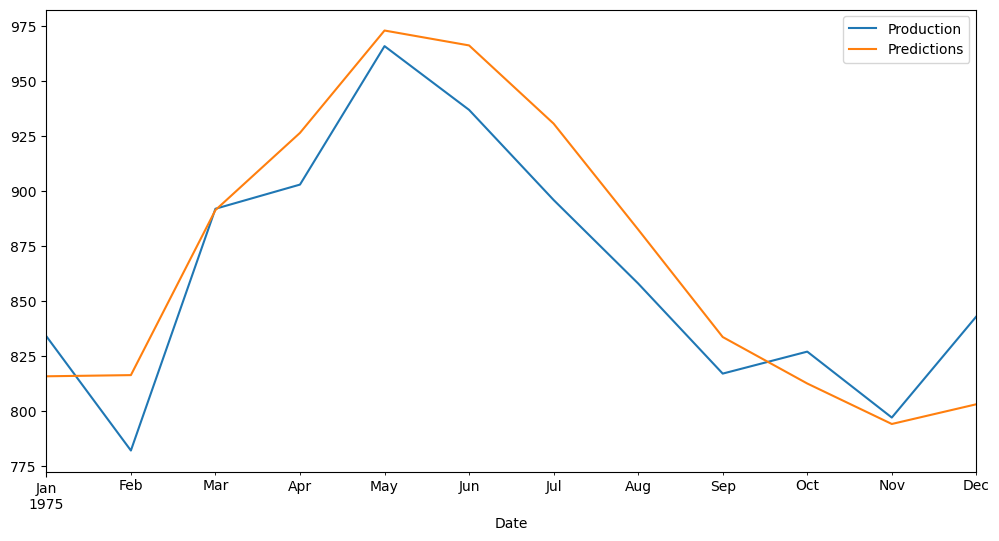

In [61]:
test.plot(figsize=(12,6))

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt 
rmse = sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)


23.937222633731192
